In [1]:
#!python3.7 -m pip install flat
#!python3.7 -m pip install bezmerizing-master.zip

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
Processing ./bezmerizing-master.zip
  Created wheel for bezmerizing: filename=bezmerizing-0.1.0-py3-none-any.whl size=8434 sha256=dd1bbee3702d7c3461dad2a33d89d04b214cfd6cb343f4e08479e4843a990e9b
  Stored in directory: /home/javi/.cache/pip/wheels/73/6b/48/2b6c7fece7493df8474b27ac6958ecca65213057e8c502cb37
Successfully built bezmerizing
  Attempting uninstall: bezmerizing
    Found existing installation: bezmerizing 0.1.0
    Uninstalling bezmerizing-0.1.0:
      Successfully uninstalled bezmerizing-0.1.0
You should consider upgrading via the '/usr/bin/python3.7 -m pip install --upgrade pip' command.


In [24]:
import json
from random import choice 
from flat import document, shape, rgba
from IPython.display import Image, display
import numpy as np
#from numpy.random import uniform, normal, choice

In [40]:
def show(page):
    display(Image(page.image(kind='rgba').png()))
    
def flatten(t):
    from itertools import chain
    return list(chain(*t))

def scale(t, val):
    return np.array(t) * val

def translate(t, offset):
    return np.array(t) + np.array(offset)



In [41]:
chars = json.load(open("char74k-normalized.json"))

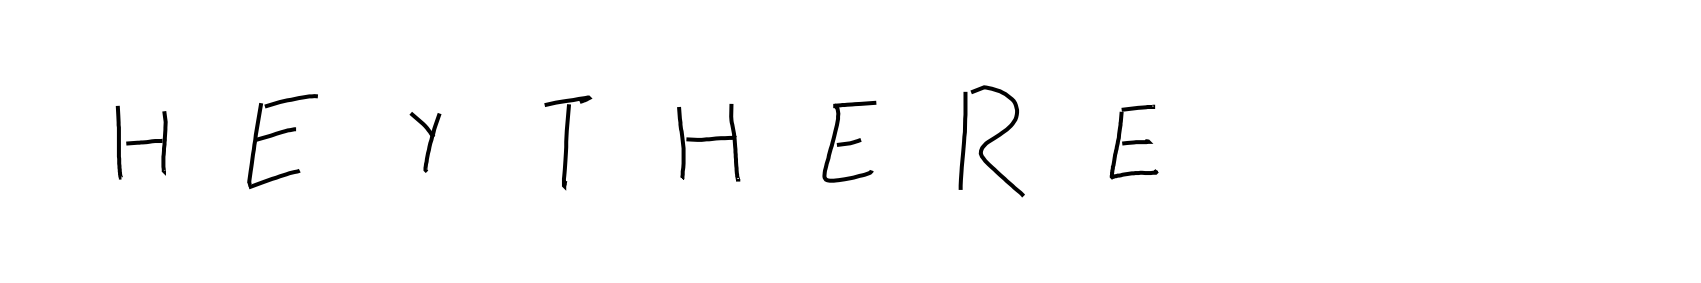

In [42]:
d = document(600, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 255)).width(4)

sentence = [ "H", "E", "Y", "T", "H", "E", "R", "E"  ]

s = 0.1
x = 50
y = 50
for letter in sentence:
    form = choice(chars[letter])
    for stroke in form:
        lines = figure.polyline(flatten(translate(scale(stroke, s), [x, y])))
        page.place(lines)
    x+=50
    
show(page)